# Обработка изображений. Операция свертки. Линейные фильтры

In [ ]:
pip install opencv-python

In [13]:
%matplotlib inline
from skimage.io import imread, imshow, imsave
import numpy as np 
import matplotlib.pyplot as plt
import cv2  

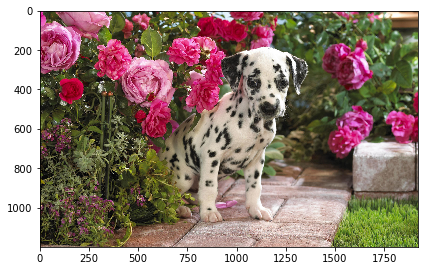

In [14]:
img = imread("dog.jpg")
imshow("dog.jpg")

### Фильтр высоких частот

In [ ]:
img_src = img 

kernel = np.array([[0.0, -1.0, 0.0], 
                   [-1.0, 4.0, -1.0], 
                   [0.0, -1.0, 0.0]]) 
kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1) 
img_rst = cv2.filter2D(img_src,-1,kernel) 
cv2.imwrite('result.jpg',img_rst)

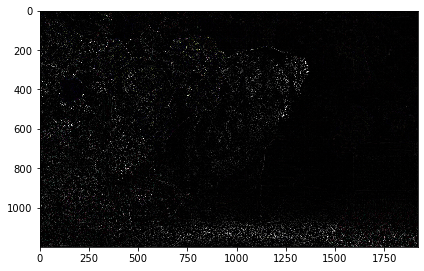

In [15]:
imshow('result.jpg')

### Двумерная свёртка

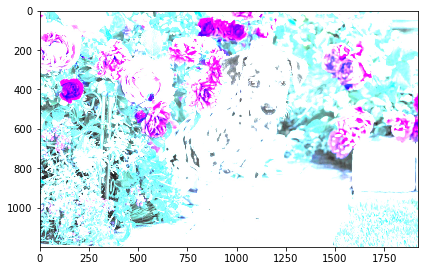

In [15]:
img_src = img
kernel = np.array([[1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1]]) 
kernel = kernel/sum(kernel) 
img_rst = cv2.filter2D(img_src,-1,kernel)
cv2.imwrite('result1.jpg',img_rst)
imshow('result1.jpg')

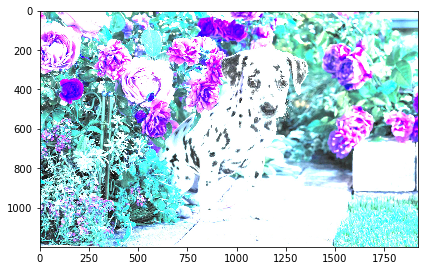

In [18]:
kernel = np.array([[0.0, -1.0, 0.0], 
                   [-1.0, 5.0, -1.0], 
                   [0.0, -1.0, 0.0]])
kernel = kernel/sum(kernel) 
img_rst = cv2.filter2D(img_src,-1,kernel)
cv2.imwrite('result2.jpg',img_rst)
imshow('result2.jpg')

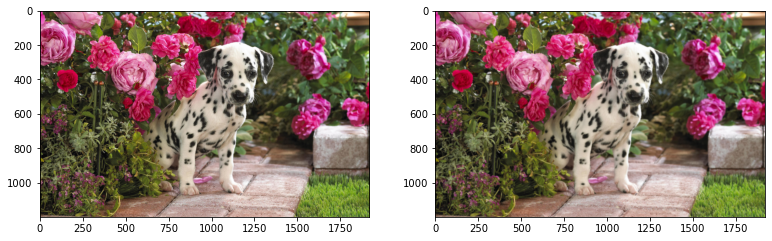

In [21]:
img = cv2.imread("dog.jpg")
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
box = cv2.boxFilter(rgb_img,-1,(5,5),normalize=True)
 
plt.figure(figsize=(13,13))
plt.subplot (1,2,1)
plt.imshow (rgb_img)
plt.subplot(1,2,2)
plt.imshow(box)
 
plt.show()

## Оценка зависимости времени выполнения от размера Box фильтра

[0.07260650000000624, 0.06075989999999365, 0.12205739999996013, 0.07541129999998475, 0.06341609999998354, 0.06778050000002622, 0.06410799999997607]


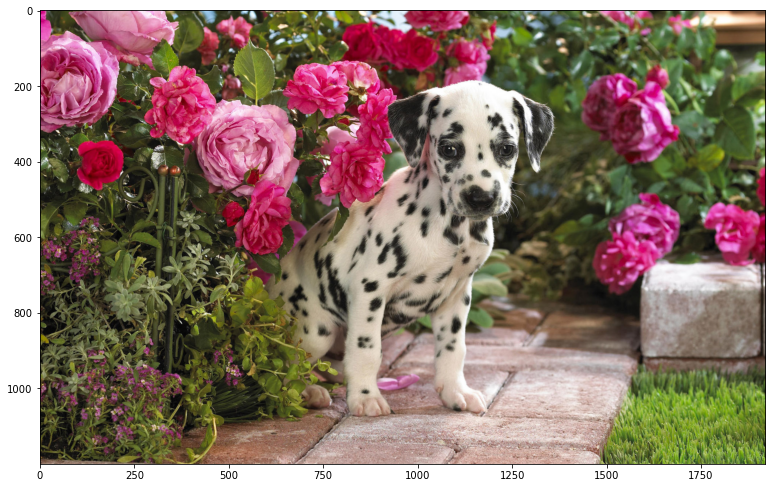

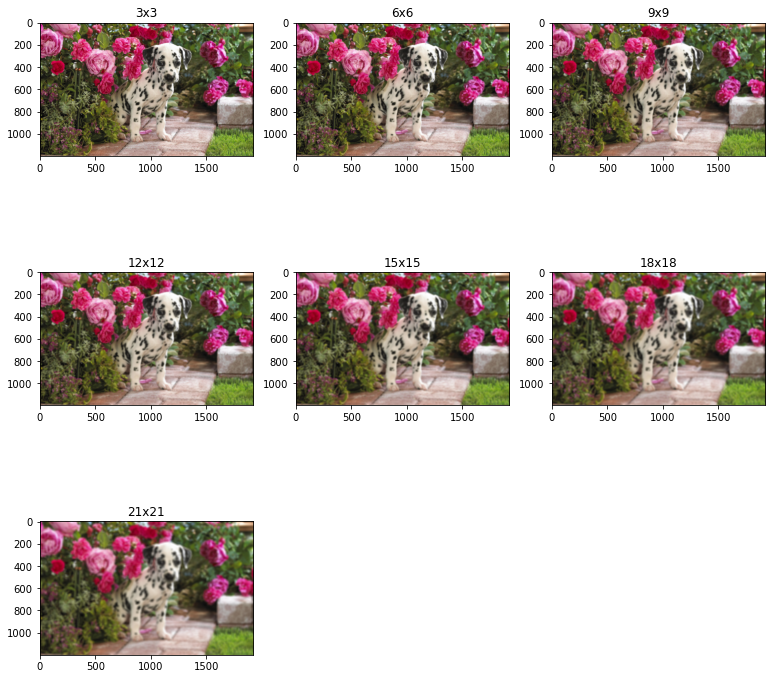

In [19]:
import time

runtime = []
ksize = [3, 6, 9, 12, 15, 18, 21]
img = cv2.imread("dog.jpg")

rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(13,13))
plt.imshow (rgb_img)

fig = plt.figure(figsize=(13, 13))


for idx, size in enumerate(ksize):
    start_time = time.perf_counter()
    box = cv2.boxFilter(rgb_img,-1,(size,size),normalize=True)
    fig.add_subplot(3, 3, idx + 1)
    plt.title(f"{size}x{size}")
    plt.imshow(box)
    runtime.append(time.perf_counter() - start_time)

print(runtime)

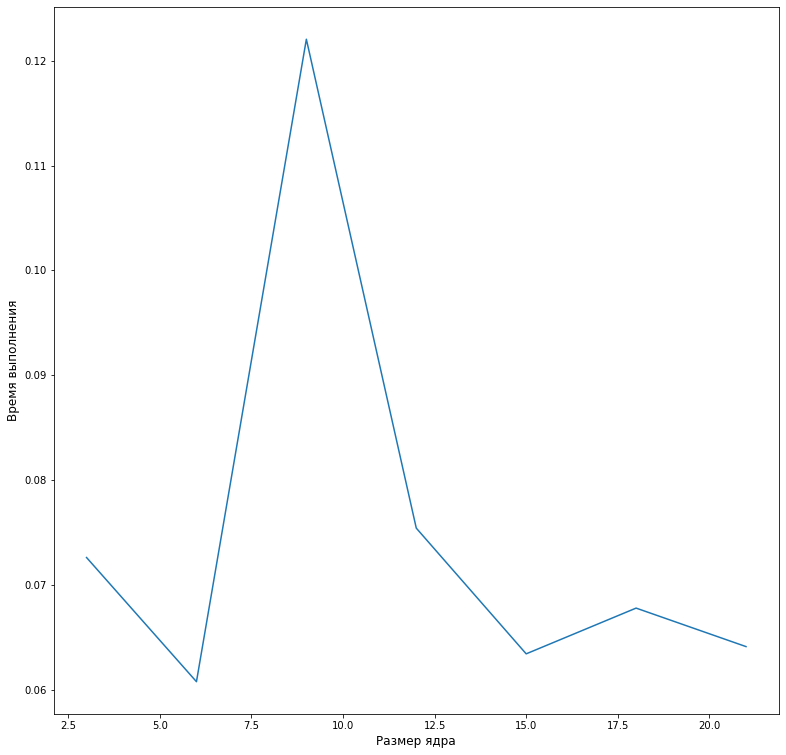

In [23]:
fig2 = plt.figure(figsize=(13,13))
plt.plot(ksize, runtime)
plt.xlabel('Размер ядра', fontsize=12)
plt.ylabel('Время выполнения', fontsize=12)
plt.show()

## Сравнение с фильтрацией Гаусса

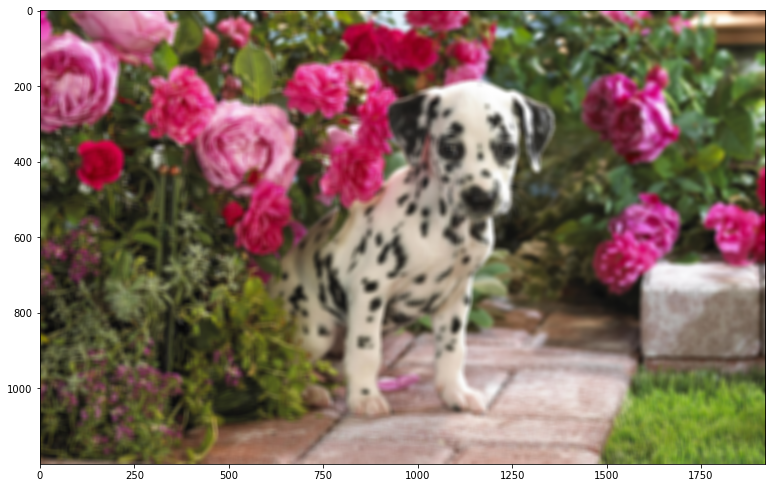

In [28]:
img = cv2.imread("dog.jpg")

rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
box = cv2.boxFilter(rgb_img,-1,(15,15),normalize=True)
 
plt.figure(figsize=(13,13))
plt.imshow(box)

plt.show()

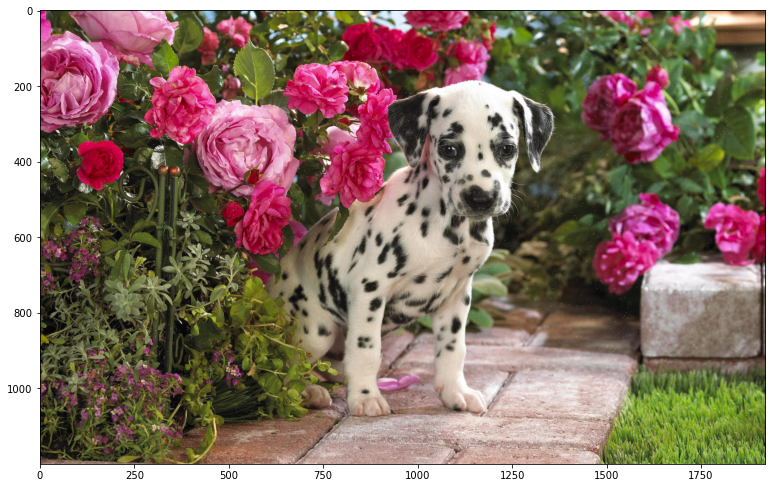

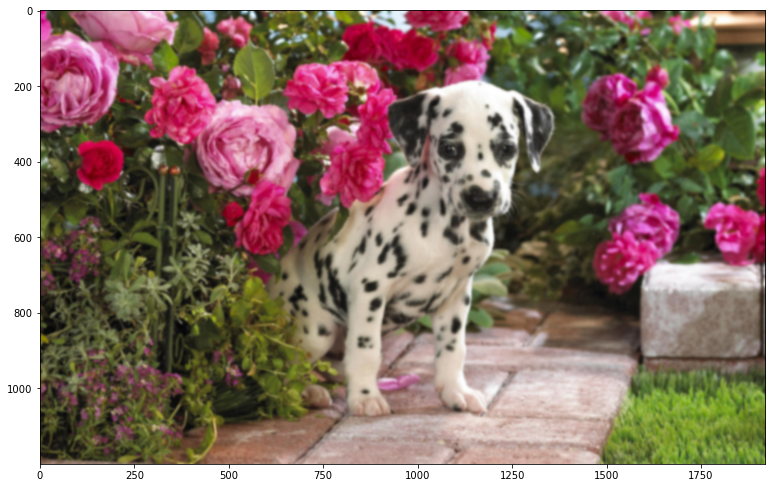

In [25]:
img = cv2.imread("dog.jpg")
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

for i in range(2000):  
    temp_x = np.random.randint(0, rgb_img.shape[0])
    temp_y = np.random.randint(0, rgb_img.shape[1])
    rgb_img[temp_x][temp_y] = 255

plt.figure(figsize=(13,13))
plt.imshow(rgb_img)

gauss = cv2.GaussianBlur(rgb_img,(15,15),0)
plt.figure(figsize=(13,13))
plt.imshow(gauss)


plt.show()

## Таким образом, мы можем сделать вывод, что изображение отфильтрованное методом Гаусса размывается лучше и не имеет шумов.